# Testing my environment

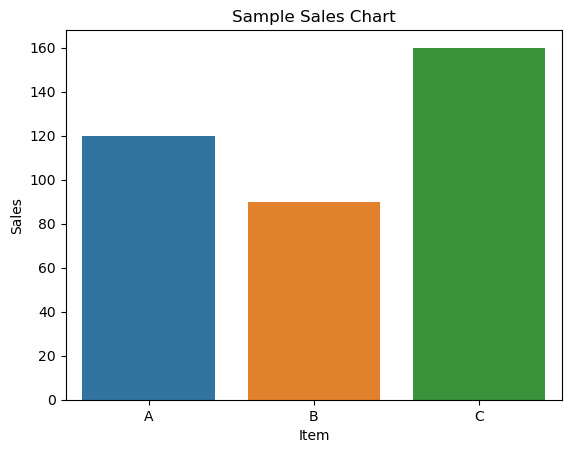

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data
data = pd.DataFrame({
    'Item': ['A', 'B', 'C'],
    'Sales': [120, 90, 160]
})

# Create bar chart
sns.barplot(x='Item', y='Sales', data=data)
plt.title("Sample Sales Chart")
plt.show()



I love this

In [3]:
pip install pandas numpy statsmodels openpyxl xlsxwriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 3.6 MB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
breach_analysis.py

NameError: name 'breach_analysis' is not defined

In [7]:
df = pd.read_csv("/Users/amarachukwuobi/Desktop/DataBreach/compustat_breach_exactmatch.numbers
")


SyntaxError: unterminated string literal (detected at line 1) (2813341165.py, line 1)

In [9]:
import pandas as pd

# 1. Read the compustat file (after exporting from Numbers to CSV or Excel)
compustat_df = pd.read_csv("/Users/amarachukwuobi/Desktop/DataBreach/compustat_breach_exactmatch.csv")

# 2. Read the findata Excel file
findata_df = pd.read_excel("/Users/amarachukwuobi/Downloads/findata_ch_updated.xlsx")

# 3. Check the first few rows to confirm
print(compustat_df.head())
print(findata_df.head())


FileNotFoundError: [Errno 2] No such file or directory: '/Users/amarachukwuobi/Desktop/DataBreach/compustat_breach_exactmatch.csv'

In [13]:
import pandas as pd

# File paths you provided
comp_path = "/Users/amarachukwuobi/Downloads/compustat_breach_exactmatch.csv"
fin_path  = "/Users/amarachukwuobi/Desktop/DataBreach/findata_ch_updated.xlsx"

# Read
comp = pd.read_csv(comp_path, dtype={"cusip": str}, low_memory=False)
fin  = pd.read_excel(fin_path, dtype={"cusip": str})




In [17]:
print (comp) 


     compustat_cusip  compustat_gvkey compustat_tic  compustat_sic  \
0           04273510             1773           ARW           5065   
1           50212V10           178519          LPLA           6211   
2           57576793           122614         9759B           6311   
3           68299F93            22342         9505B           6141   
4           19104210             4128          COBR           3663   
...              ...              ...           ...            ...   
7689        93403J10            39502          WRBY           5990   
7690        02581610             1447           AXP           6141   
7691        86415910            10124           RGR           3480   
7692        76973Q20           180562          RRTS           4731   
7693        25470910           177376           DFS           6141   

      compustat_year                          compustat_name  \
0               1980                   Arrow Electronics Inc   
1               2007           

In [19]:
print (fin) 

         cusip      iymd      tvol      beta      ivol  year   gvkey   sic  \
0     00036110  20190806  0.347625  1.140326  0.282819  2019    1004  5080   
1     00036110  20190812  0.352359  1.161675  0.284453  2019    1004  5080   
2     00037520  20160317  0.213028  0.860438  0.149122  2016  210418  3613   
3     00037520  20160321  0.211149  0.853396  0.147992  2016  210418  3613   
4     00037520  20170911  0.161935  0.976339  0.139234  2017  210418  3613   
...        ...       ...       ...       ...       ...   ...     ...   ...   
3040  H1467J10  20200817  0.454833  1.043569  0.269101  2020   28034  6331   
3041  H1467J10  20200817  0.454833  1.043569  0.269101  2020   28034  6331   
3042  V7780T10  20181109  0.266405  1.161247  0.207430  2018   28191  4400   
3043  V7780T10  20210622  0.643519  1.372316  0.479882  2021   28191  4400   
3044  V7780T10  20210623  0.633046  1.289693  0.478997  2021   28191  4400   

         oibdp       sale  ...  high_tech       roa  paststkret

In [21]:

# Rename comp key to align with fin
comp = comp.rename(columns={"compustat_cusip": "cusip"})

# Clean keys
comp["cusip"] = comp["cusip"].astype(str).str.strip()
fin["cusip"]  = fin["cusip"].astype(str).str.strip()

comp["iymd"] = pd.to_numeric(comp["iymd"], errors="coerce").astype("Int64")
fin["iymd"]  = pd.to_numeric(fin["iymd"], errors="coerce").astype("Int64")


In [25]:
# Merge
merged = pd.merge(comp, fin, on=["cusip","iymd"], how="inner")

# Quick checks
print("comp rows:", comp.shape[0], " | fin rows:", fin.shape[0], " | merged rows:", merged.shape[0])
merged.head()

comp rows: 7694  | fin rows: 3045  | merged rows: 4646


,cusip,compustat_gvkey,compustat_tic,compustat_sic,compustat_year,compustat_name,compustat_norm_name,breach_org_name,breach_norm_org_name,id,...,high_tech,roa,paststkret,IndustryGroup,tvol_post,beta_post,ivol_post,tvol_ch,beta_ch,ivol_ch
0,50212V10,178519,LPLA,6211,2007,LPL Financial Holdings Inc,LPL FINANCIAL,LPL Financial,LPL FINANCIAL,00088938-1c11-5554-800c-421bf4fd2416,...,0,0.044646,NaN,11,0.286502,0.900377,0.230526,0.023237,0.108670,0.016284
1,59522J10,29649,MAA,6798,1993,Mid-America Apartment Communities Inc,MID AMERICA APARTMENT COMMUNITIES,Mid-America Apartment Communities,MID AMERICA APARTMENT COMMUNITIES,001e7eb1-ab8a-5e49-8345-b7c733771467,...,0,0.048525,0.195557,11,0.207328,0.633612,0.169949,0.032328,0.022548,0.014033
2,59522J10,29649,MAA,6798,1993,Mid-America Apartment Communities Inc,MID AMERICA APARTMENT COMMUNITIES,"Mid-America Apartment Communities, Inc.",MID AMERICA APARTMENT COMMUNITIES,0fedee34-55d6-5a36-8a12-ba0ac424caf7,...,0,0.048525,0.195557,11,0.207328,0.633612,0.169949,0.032328,0.022548,0.014033
3,59522J10,29649,MAA,6798,1993,Mid-America Apartment Communities Inc,MID AMERICA APARTMENT COMMUNITIES,"Mid-America Apartment Communities, Inc.",MID AMERICA APARTMENT COMMUNITIES,f4209d17-94a2-5e56-adec-1f462f6e9184,...,0,0.048525,0.195557,11,0.207328,0.633612,0.169949,0.032328,0.022548,0.014033
4,35671D85,14590,FCX,1000,1988,Freeport-McMoRan Inc,FREEPORT MCMORAN,Freeport-McMoRan Inc.,FREEPORT MCMORAN,0029a41c-5944-5b1d-a3c1-dfed2588db23,...,0,0.035196,0.019929,12,0.257997,1.484862,0.194638,-0.168247,0.088013,-0.133275


In [39]:
# 2. Year distribution with counts + percentages
year_dist = (
    merged["year"].dropna().astype(int).value_counts().sort_index()
    .rename_axis("year").reset_index(name="count")
)
year_dist["percentage"] = ((year_dist["count"] / year_dist["count"].sum()) * 100).round(2)
print("Year distribution (counts + %):")
display(year_dist)


Year distribution (counts + %):


,year,count,percentage
0,2011,100,2.15
1,2012,247,5.32
2,2013,261,5.62
3,2014,260,5.60
4,2015,329,7.08
5,2016,421,9.06
6,2017,401,8.63
7,2018,438,9.43
8,2019,385,8.29
9,2020,322,6.93


In [29]:
3. Industry distribution with counts + percentages
industry_dist = (
    merged["IndustryGroup"].fillna("Unknown").value_counts()
    .rename_axis("IndustryGroup").reset_index(name="count")
)
industry_dist["percentage"] = ((industry_dist["count"] / industry_dist["count"].sum()) * 100).round(2)
print("Industry distribution (counts + %):")
display(industry_dist)

Industry distribution:


,IndustryGroup,count
0,11,2048
1,9,598
2,6,595
3,12,531
4,10,321
5,3,181
6,1,129
7,7,97
8,2,45
9,4,41


In [31]:
# 4. Breach type distribution
def norm_btype(x):
    if pd.isna(x): return "UNKN"
    s = str(x).upper()
    if "CARD" in s or "PAYMENT" in s: return "CARD"
    if "HACK" in s or "MALWARE" in s: return "HACK"
    if "INS" in s: return "INSD"
    if "PHYS" in s: return "PHYS"
    if "PORT" in s and "REPORT" not in s: return "PORT"
    if "STAT" in s and "STATION" in s: return "STAT"
    if "DISC" in s or "DISCLOS" in s or "UNINTENDED" in s: return "DISC"
    if "UNK" in s: return "UNKN"
    return "UNKN"

merged["breach_type_norm"] = merged["breach_type"].map(norm_btype) if "breach_type" in merged.columns else "UNKN"
type_dist = (
    merged["breach_type_norm"].value_counts()
    .rename_axis("breach_type_norm").reset_index(name="count")
)
print("Breach type distribution:")
display(type_dist)


Breach type distribution:


,breach_type_norm,count
0,UNKN,2718
1,HACK,1189
2,PHYS,310
3,DISC,243
4,INSD,98
5,PORT,72
6,CARD,16


In [33]:
# 5. Correlation matrix
corr_vars = ["tvol_ch","beta_ch","ivol_ch"]
corr = merged[corr_vars].apply(pd.to_numeric, errors="coerce").corr()
print("Correlation matrix:")
display(corr)


Correlation matrix:


,tvol_ch,beta_ch,ivol_ch
tvol_ch,1.000000,0.352108,0.908733
beta_ch,0.352108,1.000000,0.209987
ivol_ch,0.908733,0.209987,1.000000


In [35]:
# 6. Summary statistics
stats_vars = ["tvol_ch","beta_ch","ivol_ch","bklev","fcf","mtb",
              "noncash_workcap","salegrow_yr","asset","ppe","frmlev","dpo","roa"]
summary_stats = merged[stats_vars].apply(pd.to_numeric, errors="coerce").describe().T
summary_stats["missing"] = merged.shape[0] - merged[stats_vars].notna().sum().values
print("Summary statistics:")
display(summary_stats)

Summary statistics:


,count,mean,std,min,25%,50%,75%,max,missing
tvol_ch,4323.0,-0.006702,0.188734,-0.964426,-0.091617,-0.012911,0.048196,1.536341e+00,323
beta_ch,4323.0,-0.002995,0.430748,-3.015187,-0.213881,-0.012732,0.200572,4.501557e+00,323
ivol_ch,4323.0,-0.000075,0.137696,-0.748539,-0.052561,-0.009220,0.037313,1.580597e+00,323
bklev,4646.0,0.297772,0.220255,0.000000,0.119961,0.274234,0.404995,1.930830e+00,0
fcf,4646.0,0.030581,0.127208,-3.088060,0.010342,0.032483,0.065744,3.438652e-01,0
mtb,4646.0,1.644501,2.089161,0.000093,0.604396,0.974749,1.636320,1.154695e+01,0
noncash_workcap,4646.0,0.682725,0.260691,-1.031789,0.532397,0.757007,0.866584,1.000000e+00,0
salegrow_yr,4243.0,0.180677,4.562842,-0.990421,-0.003635,0.049490,0.121237,2.258695e+02,403
asset,4646.0,161639.603642,487414.041118,11.702000,3927.874000,18373.700000,147470.000000,3.261519e+06,0
ppe,4534.0,0.146442,0.188697,0.000000,0.023736,0.060015,0.225381,9.236777e-01,112


In [48]:
import pandas as pd

# Ensure normalized breach type exists (from earlier step)
if "breach_type_norm" not in merged.columns:
    def norm_btype(x):
        if pd.isna(x): return "UNKN"
        s = str(x).upper()
        if "CARD" in s or "PAYMENT" in s: return "CARD"
        if "HACK" in s or "MALWARE" in s: return "HACK"
        if "INS"  in s: return "INSD"
        if "PHYS" in s: return "PHYS"
        if "PORT" in s and "REPORT" not in s: return "PORT"
        if "STAT" in s and "STATION" in s: return "STAT"
        if "DISC" in s or "DISCLOS" in s or "UNINTENDED" in s: return "DISC"
        if "UNK"  in s: return "UNKN"
        return "UNKN"
    merged["breach_type_norm"] = merged.get("breach_type", "UNKN")
    merged["breach_type_norm"] = merged["breach_type_norm"].map(norm_btype)

types = ["CARD","HACK","INSD","PHYS","PORT","STAT","DISC","UNKN"]
def year_table(df):
    t = (df["year"].dropna().astype(int).value_counts().sort_index()
         .rename_axis("year").reset_index(name="count"))
    if not t.empty:
        t["percentage"] = (t["count"] / t["count"].sum() * 100).round(2)
    return t

def industry_table(df):
    t = (df.get("IndustryGroup", pd.Series(index=df.index, dtype="object")).fillna("Unknown")
         .value_counts().rename_axis("IndustryGroup").reset_index(name="count"))
    if not t.empty:
        t["percentage"] = (t["count"] / t["count"].sum() * 100).round(2)
    return t

def type_table(df):
    t = (df["breach_type_norm"].value_counts()
         .rename_axis("breach_type_norm").reset_index(name="count"))
    if not t.empty:
        t["percentage"] = (t["count"] / t["count"].sum() * 100).round(2)
    return t

def corr_table(df):
    return df[["tvol_ch","beta_ch","ivol_ch"]].apply(pd.to_numeric, errors="coerce").corr()

def stats_table(df):
    cols = ["tvol_ch","beta_ch","ivol_ch","bklev","fcf","mtb",
            "noncash_workcap","salegrow_yr","asset","ppe","frmlev","dpo","roa"]
    sub = df[cols].apply(pd.to_numeric, errors="coerce")
    out = sub.describe().T
    out["missing"] = sub.shape[0] - sub.notna().sum().values
    return out

per_type_outputs = {}
for t in types:
    sub = merged[merged["breach_type_norm"] == t].copy()
    per_type_outputs[t] = {
        "year_dist": year_table(sub),
        "industry_dist": industry_table(sub),
        "type_dist": type_table(sub),     # will be all t, still included for completeness
        "corr": corr_table(sub),
        "summary_stats": stats_table(sub),
        "n_obs": len(sub),
    }

# (Optional) Save per-type to Excel
with pd.ExcelWriter("per_type_output.xlsx", engine="xlsxwriter") as w:
    for t, tables in per_type_outputs.items():
        for name, df_tbl in tables.items():
            if name == "n_obs": 
                continue
            sheet = f"{t}_{name}"[:31]
            (df_tbl if isinstance(df_tbl, pd.DataFrame) else pd.DataFrame({"note":[str(df_tbl)]})
            ).to_excel(w, sheet_name=sheet, index=False)

print("Step 7 done → per_type_output.xlsx saved.")

Step 7 done → per_type_output.xlsx saved.


In [52]:
# 8) OLS regressions (no industry/year effects)

import statsmodels.formula.api as smf
import numpy as np

predictors = ["high_tech","bklev","fcf","mtb","noncash_workcap",
              "salegrow_yr","asset","ppe","frmlev","dpo","roa"]
deps = ["tvol_ch","beta_ch","ivol_ch"]

# Coerce numeric
for c in predictors + deps:
    merged[c] = pd.to_numeric(merged[c], errors="coerce")

def run_plain(dep):
    rhs = " + ".join(predictors)
    formula = f"{dep} ~ {rhs}"
    sub = merged[[dep] + predictors].dropna()
    if sub.empty:
        print(f"{dep}: insufficient data.")
        return None
    model = smf.ols(formula, data=sub).fit()
    print(f"\n=== OLS (no FE) for {dep} ===")
    print(model.summary())
    return model

models_plain = {dep: run_plain(dep) for dep in deps}



=== OLS (no FE) for tvol_ch ===
                            OLS Regression Results                            
Dep. Variable:                tvol_ch   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     9.924
Date:                Fri, 15 Aug 2025   Prob (F-statistic):           5.10e-18
Time:                        16:28:09   Log-Likelihood:                 1012.3
No. Observations:                3866   AIC:                            -2001.
Df Residuals:                    3854   BIC:                            -1926.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept

In [54]:
# OLS with industry & year effects

# Ensure categorical FE columns exist
if "IndustryGroup" not in merged.columns:
    merged["IndustryGroup"] = "Unknown"
merged["year"] = pd.to_numeric(merged["year"], errors="coerce")

def run_fe(dep):
    rhs = " + ".join(predictors) + " + C(IndustryGroup) + C(year)"
    formula = f"{dep} ~ {rhs}"
    cols_needed = [dep] + predictors + ["IndustryGroup","year"]
    sub = merged[cols_needed].dropna()
    if sub.empty:
        print(f"{dep} (with FE): insufficient data.")
        return None
    model = smf.ols(formula, data=sub).fit()
    print(f"\n=== OLS with Industry & Year FE for {dep} ===")
    print(model.summary())
    return model

models_fe = {dep: run_fe(dep) for dep in deps}


=== OLS with Industry & Year FE for tvol_ch ===
                            OLS Regression Results                            
Dep. Variable:                tvol_ch   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     61.74
Date:                Fri, 15 Aug 2025   Prob (F-statistic):               0.00
Time:                        16:29:01   Log-Likelihood:                 1823.1
No. Observations:                3866   AIC:                            -3574.
Df Residuals:                    3830   BIC:                            -3349.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [56]:
# ===== FINAL EXPORT =====
import pandas as pd

# Save all tables to Excel
with pd.ExcelWriter("analysis_output.xlsx", engine="xlsxwriter") as writer:
    # Main tables
    year_dist.to_excel(writer, sheet_name="year_dist", index=False)
    industry_dist.to_excel(writer, sheet_name="industry_dist", index=False)
    type_dist.to_excel(writer, sheet_name="type_dist", index=False)
    corr.to_excel(writer, sheet_name="corr_matrix")
    summary_stats.to_excel(writer, sheet_name="summary_stats")

    # Per-breach-type tables
    for t, tables in per_type_outputs.items():
        for name, df_tbl in tables.items():
            if name == "n_obs":  # skip row count
                continue
            sheet = f"{t}_{name}"[:31]  # Excel sheet name limit
            (df_tbl if isinstance(df_tbl, pd.DataFrame) else pd.DataFrame({"note":[str(df_tbl)]})
            ).to_excel(writer, sheet_name=sheet, index=False)

print("✅ Saved analysis_output.xlsx")

# Save regression summaries to text file
with open("regression_results.txt", "w") as f:
    f.write("=== OLS WITHOUT INDUSTRY/YEAR FIXED EFFECTS ===\n\n")
    for dep, model in models_plain.items():
        if model:
            f.write(f"Dependent variable: {dep}\n")
            f.write(model.summary().as_text())
            f.write("\n\n")

    f.write("\n=== OLS WITH INDUSTRY/YEAR FIXED EFFECTS ===\n\n")
    for dep, model in models_fe.items():
        if model:
            f.write(f"Dependent variable: {dep}\n")
            f.write(model.summary().as_text())
            f.write("\n\n")

print("✅ Saved regression_results.txt")

✅ Saved analysis_output.xlsx
✅ Saved regression_results.txt


In [58]:
import os
os.getcwd()


'/Users/amarachukwuobi'

In [60]:
# Set file paths
out_excel = "/Users/amarachukwuobi/Desktop/DataBreach/analysis_output.xlsx"
out_txt   = "/Users/amarachukwuobi/Desktop/DataBreach/regression_results.txt"

# Save all tables to Excel
with pd.ExcelWriter(out_excel, engine="xlsxwriter") as writer:
    # Main tables
    year_dist.to_excel(writer, sheet_name="year_dist", index=False)
    industry_dist.to_excel(writer, sheet_name="industry_dist", index=False)
    type_dist.to_excel(writer, sheet_name="type_dist", index=False)
    corr.to_excel(writer, sheet_name="corr_matrix")
    summary_stats.to_excel(writer, sheet_name="summary_stats")

    # Per-breach-type tables
    for t, tables in per_type_outputs.items():
        for name, df_tbl in tables.items():
            if name == "n_obs":
                continue
            sheet = f"{t}_{name}"[:31]
            (df_tbl if isinstance(df_tbl, pd.DataFrame) else pd.DataFrame({"note":[str(df_tbl)]})
            ).to_excel(writer, sheet_name=sheet, index=False)

print(f"✅ Saved {out_excel}")

# Save regression summaries to text file
with open(out_txt, "w") as f:
    f.write("=== OLS WITHOUT INDUSTRY/YEAR FIXED EFFECTS ===\n\n")
    for dep, model in models_plain.items():
        if model:
            f.write(f"Dependent variable: {dep}\n")
            f.write(model.summary().as_text())
            f.write("\n\n")

    f.write("\n=== OLS WITH INDUSTRY/YEAR FIXED EFFECTS ===\n\n")
    for dep, model in models_fe.items():
        if model:
            f.write(f"Dependent variable: {dep}\n")
            f.write(model.summary().as_text())
            f.write("\n\n")

print(f"✅ Saved {out_txt}")

✅ Saved /Users/amarachukwuobi/Desktop/DataBreach/analysis_output.xlsx
✅ Saved /Users/amarachukwuobi/Desktop/DataBreach/regression_results.txt


In [62]:
import pandas as pd
import numpy as np

# ---- helper: format coef(SE) + stars ----
def star(p):
    return '***' if p<0.01 else '**' if p<0.05 else '*' if p<0.10 else ''

def fmt_coef(coef, se, p):
    return f"{coef:.3f} ({se:.3f}){star(p)}"

def tidy_model(model, dep_name):
    coefs = model.params
    ses   = model.bse
    pvals = model.pvalues
    rows = []
    for k in coefs.index:
        if k.startswith('Intercept'):  # usually exclude in APA table
            continue
        rows.append([k, fmt_coef(coefs[k], ses[k], pvals[k])])
    df = pd.DataFrame(rows, columns=["Variable", dep_name])
    # fit stats row
    stats = pd.DataFrame({
        "Variable": ["N", "R-squared", "Adj. R-squared"],
        dep_name: [int(model.nobs), f"{model.rsquared:.3f}", f"{model.rsquared_adj:.3f}"]
    })
    return df, stats

# Build tables (requires models_plain and models_fe from your Step 8–9 code)
deps = ["tvol_ch","beta_ch","ivol_ch"]

def combine_models_table(models_dict, title):
    # First column is Variable, subsequent columns are each dep var model
    base = None
    stats_blocks = []
    for dep in deps:
        m = models_dict.get(dep)
        if m is None:
            continue
        body, stats = tidy_model(m, dep)
        stats_blocks.append(stats)
        if base is None:
            base = body
        else:
            base = base.merge(body, on="Variable", how="outer")
    # add fit stats stacked under the table
    stats_merged = stats_blocks[0]
    for s in stats_blocks[1:]:
        stats_merged = stats_merged.merge(s, on="Variable", how="outer")
    return base, stats_merged

table_plain, stats_plain = combine_models_table(models_plain, "No FE")
table_fe,    stats_fe    = combine_models_table(models_fe,    "FE")

# Optional: nice variable labels
var_labels = {
    "high_tech":"High-tech (1/0)",
    "bklev":"Book leverage",
    "fcf":"Free cash flow",
    "mtb":"Market-to-book",
    "noncash_workcap":"Non-cash working cap.",
    "salegrow_yr":"Sales growth (YoY)",
    "asset":"Assets (log/level)",
    "ppe":"PPE",
    "frmlev":"Firm leverage",
    "dpo":"Days payable outstanding",
    "roa":"Return on assets",
    # Fixed effects terms appear as C(IndustryGroup)[T.x] etc. (not shown here)
}
for df in (table_plain, table_fe):
    df["Variable"] = df["Variable"].map(lambda v: var_labels.get(v, v))

# Save to Excel (APA-ready)
out_path = "/Users/amarachukwuobi/Desktop/DataBreach/tables_for_paper.xlsx"
with pd.ExcelWriter(out_path, engine="xlsxwriter") as w:
    table_plain.to_excel(w, sheet_name="Reg_NoFE", index=False)
    stats_plain.to_excel(w, sheet_name="Reg_NoFE", startrow=len(table_plain)+2, index=False)
    table_fe.to_excel(w, sheet_name="Reg_FE", index=False)
    stats_fe.to_excel(w, sheet_name="Reg_FE", startrow=len(table_fe)+2, index=False)

print(f"Saved APA-style tables to {out_path}")
print("Note: stars = *** p<0.01, ** p<0.05, * p<0.10")

Saved APA-style tables to /Users/amarachukwuobi/Desktop/DataBreach/tables_for_paper.xlsx
Note: stars = *** p<0.01, ** p<0.05, * p<0.10


In [64]:
# Save APA-style tables to LaTeX
latex_path_main = "/Users/amarachukwuobi/Desktop/DataBreach/tables_for_paper.tex"

with open(latex_path_main, "w") as f:
    f.write("% Stars: *** p<0.01, ** p<0.05, * p<0.10\n\n")
    f.write("\\section*{Regression Results (No Fixed Effects)}\n")
    f.write(table_plain.to_latex(index=False, escape=False))
    f.write("\n\n")
    f.write(stats_plain.to_latex(index=False, escape=False))
    f.write("\n\n\\section*{Regression Results (Industry & Year FE)}\n")
    f.write(table_fe.to_latex(index=False, escape=False))
    f.write("\n\n")
    f.write(stats_fe.to_latex(index=False, escape=False))

print(f"Saved LaTeX tables to {latex_path_main}")

Saved LaTeX tables to /Users/amarachukwuobi/Desktop/DataBreach/tables_for_paper.tex


In [68]:
!pip install python-docx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 2.8 MB/s eta 0:00:00a 0:00:01


In [70]:
# If needed: pip install python-docx
from docx import Document
from docx.shared import Inches

doc_path = "/Users/amarachukwuobi/Desktop/DataBreach/tables_for_paper.docx"

def add_table(doc, df, title):
    doc.add_heading(title, level=2)
    t = doc.add_table(rows=1, cols=len(df.columns))
    hdr = t.rows[0].cells
    for j, col in enumerate(df.columns):
        hdr[j].text = str(col)
    for _, row in df.iterrows():
        cells = t.add_row().cells
        for j, col in enumerate(df.columns):
            cells[j].text = "" if pd.isna(row[col]) else str(row[col])
    doc.add_paragraph()  # spacing

doc = Document()
doc.add_heading("Regression Tables (APA-style)", level=1)
doc.add_paragraph("Stars: *** p<0.01, ** p<0.05, * p<0.10")

add_table(doc, table_plain, "No Fixed Effects: Coefficients (coef (SE) + stars)")
add_table(doc, stats_plain, "No Fixed Effects: Fit Statistics")

add_table(doc, table_fe, "Industry & Year Fixed Effects: Coefficients")
add_table(doc, stats_fe, "Industry & Year Fixed Effects: Fit Statistics")

doc.save(doc_path)
print(f"Saved Word tables to {doc_path}")

Saved Word tables to /Users/amarachukwuobi/Desktop/DataBreach/tables_for_paper.docx
